In [6]:
#imports

from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [7]:
#Extracting Data from CSV

dataset = pd.read_csv('data.csv')
y=dataset['Label']
y=y.to_numpy()
dataset


,View Count,Subscriber Count,Video Count,Date of Registration,Likes-Dislikes Ratio,Authenticity of Featured Channels,Label
0,133962582,1250000,34,112,60.55,3,1
1,2350,56,16,90,0.87,0,0
2,11267,460,14,112,0.50,0,0
3,34234,564,15,111,0.33,0,0
4,14682,455,20,112,0.45,0,0
...,...,...,...,...,...,...,...
185,2434,43,51,615,15.30,0,1
186,5570,380,24,1913,16.34,0,1
187,151871,1300,7,649,7.24,0,0
188,5460077,12600,82,1750,8.54,0,0


In [8]:
y

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1])

In [9]:
dataset.drop('Label',axis=1,inplace=True)  # Drop Label Column
dataset=dataset.to_numpy()
dataset

array([[1.33962582e+08, 1.25000000e+06, 3.40000000e+01, 1.12000000e+02,
        6.05500000e+01, 3.00000000e+00],
       [2.35000000e+03, 5.60000000e+01, 1.60000000e+01, 9.00000000e+01,
        8.70000000e-01, 0.00000000e+00],
       [1.12670000e+04, 4.60000000e+02, 1.40000000e+01, 1.12000000e+02,
        5.00000000e-01, 0.00000000e+00],
       ...,
       [1.51871000e+05, 1.30000000e+03, 7.00000000e+00, 6.49000000e+02,
        7.24000000e+00, 0.00000000e+00],
       [5.46007700e+06, 1.26000000e+04, 8.20000000e+01, 1.75000000e+03,
        8.54000000e+00, 0.00000000e+00],
       [2.82700000e+03, 1.53000000e+03, 3.00000000e+00, 3.07000000e+02,
        9.46000000e+00, 0.00000000e+00]])

In [10]:
#Max and Min for every column in an array

max_attribute=[]
min_attribute=[]

for i in range(6):
    maxx=0
    minn=1000000
    for k in range(190):
        if(dataset[k][i]>maxx):
            maxx=dataset[k][i]
        if(dataset[k][i]<minn):
            minn=dataset[k][i]
    max_attribute.append(maxx)
    min_attribute.append(minn)

In [11]:
print(max_attribute)
print(min_attribute)

[68778855387.0, 94188956.0, 43599.0, 5614.0, 86.36, 10.0]
[0.0, 0.0, 0.0, 30.0, 0.0, 0.0]


In [12]:
for i in range(6):
    for k in range(190):
        dataset[k][i]=(dataset[k][i]-min_attribute[i])/(max_attribute[i]-min_attribute[i])

dataset

array([[1.94772916e-03, 1.32711950e-02, 7.79834400e-04, 1.46848138e-02,
        7.01134785e-01, 3.00000000e-01],
       [3.41674776e-08, 5.94549535e-07, 3.66980894e-04, 1.07449857e-02,
        1.00741084e-02, 0.00000000e+00],
       [1.63814881e-07, 4.88379975e-06, 3.21108282e-04, 1.46848138e-02,
        5.78971746e-03, 0.00000000e+00],
       ...,
       [2.20810595e-06, 1.38020428e-05, 1.60554141e-04, 1.10852436e-01,
        8.38351088e-02, 0.00000000e+00],
       [7.93859824e-05, 1.33773645e-04, 1.88077708e-03, 3.08022923e-01,
        9.88883742e-02, 0.00000000e+00],
       [4.11027486e-08, 1.62439427e-05, 6.88089176e-05, 4.96060172e-02,
        1.09541454e-01, 0.00000000e+00]])

In [13]:
part1=dataset[:, :3]  # First 3
part2=dataset[:, 3:6] # last 3

#part1
#part2

In [14]:
X=np.zeros((190,2))
for i in range(190):
    if(y[i]==1):
        X[i][0]=(part1[i][0]+part1[i][1]+part1[i][2])/3
        X[i][1]=(part2[i][0]+part2[i][1]+part2[i][2])/3
    else:
        X[i][0]=100*(part1[i][0]+part1[i][1]+part1[i][2])/3
        X[i][1]=(part2[i][0]+part2[i][1]+part2[i][2])/3
X

array([[5.33291951e-03, 3.38606533e-01],
       [1.22536537e-02, 6.93969802e-03],
       [1.08718632e-02, 6.82484374e-03],
       [1.16843431e-02, 6.10898139e-03],
       [1.54590100e-02, 6.63185316e-03],
       [1.16332237e-02, 5.45234338e-03],
       [1.08244575e-02, 8.69099078e-03],
       [1.16340210e-02, 8.57566646e-03],
       [1.77143068e-02, 8.63536083e-03],
       [1.53235825e-03, 5.45234338e-03],
       [7.64548376e-04, 4.83524355e-03],
       [7.70604876e-04, 5.51156771e-03],
       [7.65264896e-04, 4.83524355e-03],
       [1.53229880e-03, 5.60314147e-03],
       [1.53122111e-03, 5.25216404e-03],
       [7.64559038e-04, 5.78269460e-03],
       [7.64905182e-04, 4.83524355e-03],
       [7.64757565e-03, 9.11963447e-03],
       [3.82769393e-03, 8.36517401e-03],
       [4.58835001e-03, 5.90880205e-03],
       [1.03792230e-01, 3.77148875e-01],
       [9.18816435e-03, 9.64250624e-03],
       [3.83701898e-03, 1.27547420e-02],
       [1.76211004e-02, 8.79475778e-03],
       [4.591890

Text(0, 0.5, 'A2')

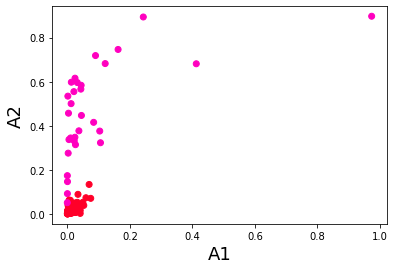

In [15]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='gist_rainbow')
plt.xlabel('A1', fontsize=18)
plt.ylabel('A2', fontsize=18)

In [16]:
k=2
color=["green","red"]
clusters={}
for i in range(k):
    center=(np.random.random((X.shape[1],))-1)
    points=[]
    cluster={
        'center':center,
        'points':points,
        'color':color[i]
    }
    clusters[i]=cluster

In [17]:
clusters[0]['center'][0]=0
clusters[0]['center'][1]=0
clusters[1]['center'][0]=0
clusters[1]['center'][1]=0.6

In [18]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [19]:
def assignpointtoclusters(clusters):
    for ix in range(X.shape[0]):
        dist=[]
        curr_x=X[ix]
        for kx in range(k):
            d=distance(curr_x,clusters[kx]['center'])
            dist.append(d)
        current_cluster=np.argmin(dist)
        clusters[current_cluster]['points'].append(curr_x)

def updateclusters(clusters):
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        if pts.shape[0]>0:
            new_u=pts.mean(axis=0)
            clusters[kx]['center']=new_u
            clusters[kx]['points']=[]
            
def plotclusters(clusters):
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        try:
            plt.scatter(pts[:,0],pts[:,1])
        except:
            pass
        uk=clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="^")

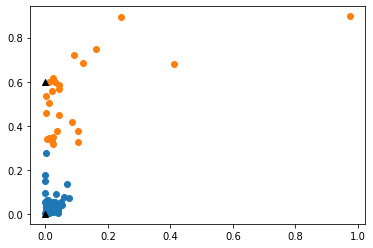

In [20]:
assignpointtoclusters(clusters)
plotclusters(clusters)
updateclusters(clusters)

In [21]:
km = KMeans(n_clusters = 2)
km.fit(X)

KMeans(n_clusters=2)

In [22]:
centers = km.cluster_centers_
print(centers)

[[0.01153305 0.02373078]
 [0.10657027 0.53036807]]


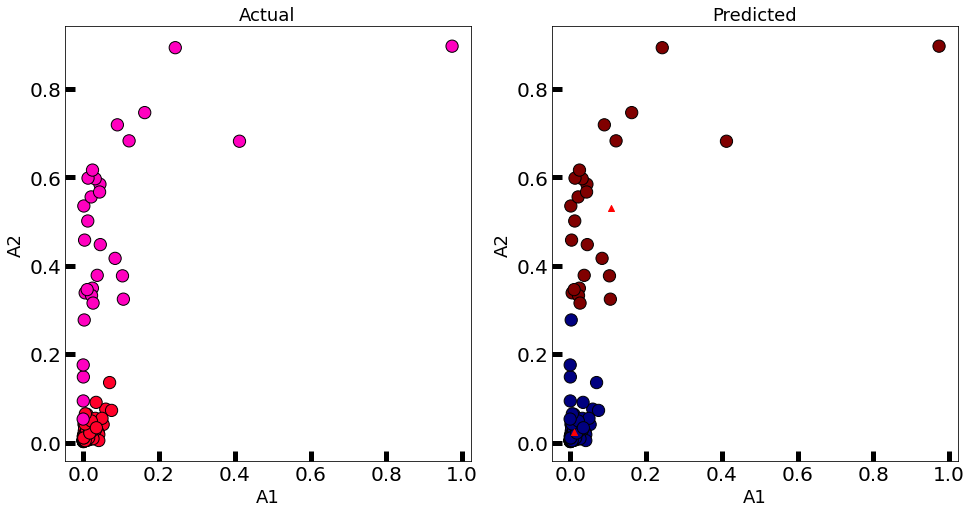

In [23]:
new_labels = km.labels_
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('A1', fontsize=18)
axes[0].set_ylabel('A2', fontsize=18)
axes[1].set_xlabel('A1', fontsize=18)
axes[1].set_ylabel('A2', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)
plt.scatter(centers[:,0], centers[:,1], marker="^", color='r')
plt.show()

In [24]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y, km.labels_)
print("Accuracy score is", acc)

Accuracy score is 0.9736842105263158


In [25]:
print(km.labels_)
print(y)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 1]


In [26]:
centers = np.array(km.cluster_centers_)
centers

array([[0.01153305, 0.02373078],
       [0.10657027, 0.53036807]])

In [27]:
y_actual=pd.Series(y,name='ACTUAL')
y_predicted=pd.Series(km.labels_,name='PREDICTED')

In [28]:
confusion_mat=pd.crosstab(y_predicted,y_actual)
confusion_mat

ACTUAL,0,1
PREDICTED,,
0,160,5
1,0,25


In [29]:
confusion_mat=confusion_mat.to_numpy()
Total=confusion_mat[0][0]+confusion_mat[0][1]+confusion_mat[1][0]+confusion_mat[1][1]

In [30]:
Accuracy = (confusion_mat[0][0]+confusion_mat[1][1])/Total
Recall = confusion_mat[0][0]/(confusion_mat[0][0]+confusion_mat[1][0])
Precision = confusion_mat[0][0]/(confusion_mat[0][0]+confusion_mat[0][1])
F_Measure = (2*Recall*Precision)/(Recall+Precision)
False_Positive_Rate = confusion_mat[0][1]/(confusion_mat[0][0]+confusion_mat[0][1])
True_Negative_Rate = confusion_mat[0][0]/(confusion_mat[0][0]+confusion_mat[0][1])
Specificity = confusion_mat[0][0]/(confusion_mat[0][0]+confusion_mat[0][1])
G_Measure = 2*Recall*(100-False_Positive_Rate)/(Recall+(100-False_Positive_Rate))
G_Mean = (Specificity*Recall)**0.5
a_positive = confusion_mat[1][1]/(confusion_mat[0][1]+confusion_mat[1][1])
a_negative = confusion_mat[0][0]/(confusion_mat[0][0]+confusion_mat[1][0])
G_Mean_2 = (a_positive*a_negative)**0.5
Balance=1-(((0-False_Positive_Rate)**2+(1-Recall)**2)/2)**0.5

In [31]:
print(Accuracy)
print(Recall)
print(Precision)
print(F_Measure)
print(False_Positive_Rate)
print(True_Negative_Rate)
print(Specificity)
print(G_Measure)
print(G_Mean)
print(a_positive)
print(a_negative)
print(G_Mean_2)
print(Balance)

0.9736842105263158
1.0
0.9696969696969697
0.9846153846153847
0.030303030303030304
0.9696969696969697
0.9696969696969697
1.9801920768307324
0.9847319278346619
0.8333333333333334
1.0
0.9128709291752769
0.9785725217822259


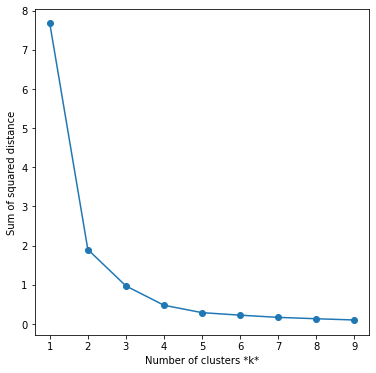

In [32]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');